In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2]:
#download the dataset from keras
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## 探索data的形式

In [3]:
#探索data
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("train data:{}".format(train_data[1]))
print("train labels:{}".format(train_labels[1]))

Training entries: 25000, labels: 25000
train data:[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
train labels:0


我们可以发现，所有字符都已经转换成对应都int形式了。  
而labels用 0 1表示积极或者消极。

In [4]:
print("the type of data is:{}:".format(type(train_data)))
print("the type of train_data in every cell in numpy:{}".format(
    type(train_data[1])))

the type of data is:<class 'numpy.ndarray'>:
the type of train_data in every cell in numpy:<class 'list'>


train data的类型是numpy，而numpy中每个cell中放的是一个list

In [5]:
print("the length of first list in numpy cell:{},{},{}".format(
    len(train_data[1]),len(train_data[0]),len(train_data[2])))

the length of first list in numpy cell:189,218,141


每个list的长度还不尽相同，这是由于影评的长度不同导致的的

In [6]:
#网上有现成的word和integer dict格式的mapping

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()


In [7]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
# dict的赋值，dict[key]=value


reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    #dict.items()是一对一对的拿出来
    #for(a,b)  in (D,C)会把D,C一对一对拿出来，赋值给a和b，
    #dict([(a,b),(c,d)])是分别把两对放到dict之中。
    #因此 dict([(value,key)for (key,value) in word_index.items()])表示
        #把word_index一对一对拿出来，而后赋值给变量（key，value），
        #而后（key，value）对应赋值给（value，key）完成key和value的对换
        #对换之后的pair，放在reverse_word_index之中。
        #我们得到的就是原来dict的reverse

        
def decode_review(text):
    return ' '.join([reverse_word_index.get(i) for i in text])
    #dict.get（key）返回的是key对应的value，
    #'str'.join(sequence)把sequence中的每个元素，都以str为链接（间隔链接起来）
    #' '.join()表示以空格相连。

我们可以看到这是一个dict格式的，左边是words，右边是对应的int

In [9]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [10]:
 dict1 = {'firstname':'ma', 'lastname':'yun'}

## 数据处理

用pad_sequences来将所有数据均padding到同一个长度。

In [11]:
#对test和train的input都padding到同一个长度。
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],padding='post',maxlen=256)
        # value是padding的内容
        # padding是padding在前面还是padding在后面
        # maxlen表示最大的长度
        
test_data = keras.preprocessing.sequence.pad_sequences(test_data,value=word_index["<PAD>"],padding='post',maxlen=256)


#这里padding以后，每一行都是np的格式了，不是list了！！


In [12]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

我们可以看到，所有不够长度的sequence，在结尾都padding上了0，而0对应PAD 

In [13]:
print(train_data[1])

[   1  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26
    4  715    8  118 1634   14  394   20   13  119  954  189  102    5
  207  110 3103   21   14   69  188    8   30   23    7    4  249  126
   93    4  114    9 2300 1523    5  647    4  116    9   35 8163    4
  229    9  340 1322    4  118    9    4  130 4901   19    4 1002    5
   89   29  952   46   37    4  455    9   45   43   38 1543 1905  398
    4 1649   26 6853    5  163   11 3215    2    4 1153    9  194  775
    7 8255    2  349 2637  148  605    2 8003   15  123  125   68    2
 6853   15  349  165 4362   98    5    4  228    9   43    2 1157   15
  299  120    5  120  174   11  220  175  136   50    9 4373  228 8255
    5    2  656  245 2350    5    4 9837  131  152  491   18    2   32
 7464 1212   14    9    6  371   78   22  625   64 1382    9    8  168
  145   23    4 1690   15   16    4 1355    5   28    6   52  154  462
   33   89   78  285   16  145   95    0    0    0    0    0    0    0
    0 

## 构建模型

In [35]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,
                             kernel_regularizer=keras.regularizers.l2(0.01), 
                             activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
#我们需要加一个正则化防止过度拟合
#l2(0.001) 表示层的权重矩阵中的每个系数都会将
#0.001 * weight_coefficient_value**2



第一层是Embedding层。该层会在整数编码的词汇表中查找每个字词-索引的嵌入向量。模型在接受训练时会学习这些向量。这些向量会向输出数组添加一个维度。生成的维度为：(batch, sequence, embedding)。

接下来，一个GlobalAveragePooling1D层通过对序列维度求平均值，针对每个样本返回一个长度固定的输出向量。这样，模型便能够以尽可能简单的方式处理各种长度的输入。
目的在于减少参数，防止过度拟合。

该长度固定的输出向量会传入一个全连接( Dense)层（包含16个隐藏单元）。

最后一层与单个输出节点密集连接。应用sigmoid激活函数后，结果是介于0到1之间的浮点值，表示概率或置信水平。


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',metrics=['accuracy'])


W0813 21:51:42.363922 4743222720 deprecation.py:323] From /Users/allen/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
x_val = train_data[:10000]
        #在train_data中的第一维度中，从0到9999都拿过来
partial_x_train = train_data[10000:]
        #在train_data中第一维度中从10000到最后都拿过来
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [18]:
partial_x_train.shape

(15000, 256)

In [19]:
train_data.shape

(25000, 256)

## 训练模型（fit）

In [20]:
#fitting
history =  model.fit(partial_x_train,
                     partial_y_train,
                     epochs=40,
                     batch_size=521,
                     validation_data=(x_val,y_val),
                     verbose=2)
#verbose=1表示有进度条，=2表示没有进度条

#在这里我们把事先对训练集分好的累，一部分用来训练，一部分用来validation（验证）
#validation的作用：是阶段性的用验证集去验证目前的模型，然后时时检测test的准确率（不是学习的准确率）。


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 - 1s - loss: 0.8446 - acc: 0.6411 - val_loss: 0.8271 - val_acc: 0.7307
Epoch 2/40
15000/15000 - 1s - loss: 0.8124 - acc: 0.7195 - val_loss: 0.7978 - val_acc: 0.7416
Epoch 3/40
15000/15000 - 1s - loss: 0.7847 - acc: 0.7585 - val_loss: 0.7726 - val_acc: 0.7344
Epoch 4/40
15000/15000 - 1s - loss: 0.7609 - acc: 0.7501 - val_loss: 0.7508 - val_acc: 0.7304
Epoch 5/40
15000/15000 - 1s - loss: 0.7395 - acc: 0.7640 - val_loss: 0.7311 - val_acc: 0.7492
Epoch 6/40
15000/15000 - 1s - loss: 0.7195 - acc: 0.7671 - val_loss: 0.7124 - val_acc: 0.7631
Epoch 7/40
15000/15000 - 1s - loss: 0.6993 - acc: 0.7794 - val_loss: 0.6930 - val_acc: 0.7431
Epoch 8/40
15000/15000 - 1s - loss: 0.6779 - acc: 0.7817 - val_loss: 0.6727 - val_acc: 0.7754
Epoch 9/40
15000/15000 - 1s - loss: 0.6542 - acc: 0.7971 - val_loss: 0.6502 - val_acc: 0.7801
Epoch 10/40
15000/15000 - 1s - loss: 0.6288 - acc: 0.8054 - val_loss: 0.6269 - val_acc: 0.7896
Epoch 11/

## test

In [21]:
result = model.evaluate(test_data,test_labels)

25000/25000 [==============================] - 1s 32us/sample - loss: 0.3860 - acc: 0.8727


## 绘制history training表

In [22]:
history.history
#这是一个dict类型的文件，记录了所有training过程中对于准确度的记录per epoch

{'loss': [0.8445629472017289,
  0.8123972925742468,
  0.7846877524733543,
  0.7608531836867333,
  0.73950779389143,
  0.7194977412184079,
  0.6993470727443695,
  0.6778949726700783,
  0.6542453737298648,
  0.628831838798523,
  0.6024004062533379,
  0.5758567977190018,
  0.5511010172526042,
  0.5274073405146599,
  0.5060298753559589,
  0.48680996241172153,
  0.46969967252810796,
  0.4547730194071929,
  0.44121991290251417,
  0.4287877304474513,
  0.41789221448898317,
  0.4077726900378863,
  0.3980354038317998,
  0.38951385747591655,
  0.3812945813894272,
  0.3737330314397812,
  0.3666029779752096,
  0.3597504674931367,
  0.35356907620628675,
  0.34770783880154293,
  0.34152967579960825,
  0.3360721728463968,
  0.3307841690202554,
  0.32571353587110835,
  0.32103746181527776,
  0.31612262216210363,
  0.3116389396707217,
  0.30721321762402853,
  0.30340988956888515,
  0.2991524255156517],
 'acc': [0.6411333,
  0.7195333,
  0.75846666,
  0.75006664,
  0.764,
  0.76713336,
  0.7794,
  0.781

In [23]:
history_dict =  history.history
history_dict.keys()#dict.key()可以返回所有的keys

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [24]:
type(history_dict['loss'])
##dict的value是list形的

list

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

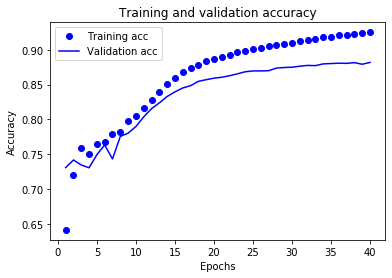

In [26]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## drop layer

在该层，随机的丢弃几个输出的特性，ie，让一个向量的第一和第三个项的值 = 0，

In [39]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)

model_drop = keras.Sequential()
model_drop.add(keras.layers.Embedding(vocab_size, 16))
model_drop.add(keras.layers.GlobalAveragePooling1D())
model_drop.add(keras.layers.Dense(16, activation=tf.nn.relu))
model_drop.add(keras.layers.Dropout(0.4))
model_drop.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))



In [40]:
model_drop.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history =  model_drop.fit(partial_x_train,
                     partial_y_train,
                     epochs=40,
                     batch_size=521,
                     validation_data=(x_val,y_val),
                     verbose=2)

Train on 15000 samples, validate on 10000 samples
Epoch 1/100
15000/15000 - 1s - loss: 0.1166 - acc: 0.9686 - val_loss: 0.3049 - val_acc: 0.8846
Epoch 2/100
15000/15000 - 1s - loss: 0.1123 - acc: 0.9692 - val_loss: 0.3074 - val_acc: 0.8847
Epoch 3/100
15000/15000 - 1s - loss: 0.1098 - acc: 0.9724 - val_loss: 0.3111 - val_acc: 0.8827
Epoch 4/100
15000/15000 - 1s - loss: 0.1059 - acc: 0.9726 - val_loss: 0.3139 - val_acc: 0.8826
Epoch 5/100
15000/15000 - 1s - loss: 0.1022 - acc: 0.9747 - val_loss: 0.3178 - val_acc: 0.8815
Epoch 6/100
15000/15000 - 1s - loss: 0.0984 - acc: 0.9747 - val_loss: 0.3209 - val_acc: 0.8813
Epoch 7/100
15000/15000 - 1s - loss: 0.0950 - acc: 0.9765 - val_loss: 0.3238 - val_acc: 0.8817
Epoch 8/100
15000/15000 - 1s - loss: 0.0928 - acc: 0.9771 - val_loss: 0.3277 - val_acc: 0.8810
Epoch 9/100
15000/15000 - 1s - loss: 0.0884 - acc: 0.9783 - val_loss: 0.3333 - val_acc: 0.8795
Epoch 10/100
15000/15000 - 1s - loss: 0.0866 - acc: 0.9795 - val_loss: 0.3359 - val_acc: 0.8798

Epoch 86/100
15000/15000 - 1s - loss: 0.0088 - acc: 0.9992 - val_loss: 0.7497 - val_acc: 0.8627
Epoch 87/100
15000/15000 - 1s - loss: 0.0082 - acc: 0.9997 - val_loss: 0.7519 - val_acc: 0.8617
Epoch 88/100
15000/15000 - 1s - loss: 0.0083 - acc: 0.9997 - val_loss: 0.7606 - val_acc: 0.8627
Epoch 89/100


KeyboardInterrupt: 

drop layer可以有效的防止过度拟合，不过也会随着训练次数过多而产生过拟合